<a href="https://colab.research.google.com/github/maralthesage/Datascience-Practice/blob/main/testing_set_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import *
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.models import Model, Sequential
from keras.optimizers import *
from keras.utils import *
import numpy as np
import os
from sklearn.metrics import confusion_matrix




In [ ]:
base_model = tf.keras.applications.VGG16(weights="imagenet", include_top=False)
base_model.summary()

# count = 0
# for layer in base_model.layers:
#   print(count, layer.name)
#   count+=1

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu", name='block1_conv1')) # layer 0 
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", name='block1_conv2')) # layer 1
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name='block1_pool')) # layer 2
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name='block2_conv1')) # layer 3
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name='block2_conv2')) # layer 4
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name='block2_pool')) # layer 5
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name='block3_conv1')) # layer 6
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name='block3_conv2')) # layer 7
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name='block3_conv3')) # layer 8
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name='block3_pool')) # layer 9
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name='block4_conv1')) # layer 10
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name='block4_conv2')) # layer 11
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name='block4_conv3')) # layer 12
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name='block4_pool')) # layer 13
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name='block5_conv1')) # layer 14
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name='block5_conv2')) # layer 15
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name='block5_conv3')) # # layer 16
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name='block5_pool')) # layer 17
model.add(Flatten()) # layer 18
model.add(Dense(units=4096,activation="relu")) # layer 19
model.add(Dense(units=4096,activation="relu")) # layer 20
model.add(Dense(units=38, activation="softmax")) # layer 21


basemodel1_w = base_model.layers[1].get_weights()[0]
basemodel1_b = base_model.layers[1].get_weights()[1]
basemodel2_w = base_model.layers[2].get_weights()[0]
basemodel2_b = base_model.layers[2].get_weights()[1]
basemodel4_w = base_model.layers[4].get_weights()[0]
basemodel4_b = base_model.layers[4].get_weights()[1]
basemodel5_w = base_model.layers[5].get_weights()[0]
basemodel5_b = base_model.layers[5].get_weights()[1]
basemodel7_w = base_model.layers[7].get_weights()[0]
basemodel7_b = base_model.layers[7].get_weights()[1]
basemodel8_w = base_model.layers[8].get_weights()[0]
basemodel8_b = base_model.layers[8].get_weights()[1]
basemodel9_w = base_model.layers[9].get_weights()[0]
basemodel9_b = base_model.layers[9].get_weights()[1]
basemodel11_w = base_model.layers[11].get_weights()[0]
basemodel11_b = base_model.layers[11].get_weights()[1]
basemodel12_w = base_model.layers[12].get_weights()[0]
basemodel12_b = base_model.layers[12].get_weights()[1]
basemodel13_w = base_model.layers[13].get_weights()[0]
basemodel13_b = base_model.layers[13].get_weights()[1]
basemodel15_w = base_model.layers[15].get_weights()[0]
basemodel15_b = base_model.layers[15].get_weights()[1]
basemodel16_w = base_model.layers[16].get_weights()[0]
basemodel16_b = base_model.layers[16].get_weights()[1]
basemodel17_w = base_model.layers[17].get_weights()[0]
basemodel17_b = base_model.layers[17].get_weights()[1]


# base = []
# for i in range(18):
#   for j in range(2):
#     if i not in [0,3,6,10,14]:
#       x = base_model.layers[i].get_weights()[j]
#       base.append(x)
#       model.layers[]

# print(len(base[0][0]))



model.layers[0].set_weights([basemodel1_w, basemodel1_b])
model.layers[1].set_weights([basemodel2_w, basemodel2_b])
# Maxpool1
model.layers[3].set_weights([basemodel4_w, basemodel4_b])
model.layers[4].set_weights([basemodel5_w, basemodel5_b])
# Maxpool2
model.layers[6].set_weights([basemodel7_w, basemodel7_b])
# model.layers[6].set_weights([basemodel8_w, basemodel8_b])
# model.layers[6].set_weights([basemodel9_w, basemodel9_b])
# Maxpool3
model.layers[8].set_weights([basemodel11_w, basemodel11_b])
model.layers[9].set_weights([basemodel12_w, basemodel12_b])
model.layers[10].set_weights([basemodel13_w, basemodel13_b])
# Maxpool5
# model.layers[14].set_weights([basemodel15_w, basemodel15_b])
model.layers[12].set_weights([basemodel16_w, basemodel16_b])
model.layers[13].set_weights([basemodel17_w, basemodel17_b])



# model.trainable = False
# model.summary()
for id, layer in enumerate(model.layers):

    model.layers[id].trainable = False

model.layers[-3].trainable = True
model.layers[-2].trainable = True
model.layers[-1].trainable = True
model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
# with tf.device('/device:GPU:0'):
size = (224, 224)
batch_size = 16
train_ds = ImageDataGenerator(
        rescale=1./255)
        # shear_range=0.2,
        # horizontal_flip=True,
        # fill_mode="nearest",
        # width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        # height_shift_range=0.1)  # randomly shift images vertically (fraction of total height))

valid_ds = ImageDataGenerator(rescale=1./255)
test_ds = ImageDataGenerator(rescale=1./255)


ds_train = train_ds.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Data/train',
        target_size= size,
        class_mode="categorical",
        seed = 42,
        batch_size=batch_size,
        shuffle=True)

ds_valid = valid_ds.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Data/valid',
        target_size= size,
        class_mode="categorical",
        seed = 42,
        batch_size=batch_size,
        shuffle=True)

ds_test = test_ds.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Data/test',
        target_size= size,
        class_mode="categorical",
        seed = 42,
        batch_size=batch_size,
        shuffle=False)

Found 5453 images belonging to 38 classes.
Found 1747 images belonging to 38 classes.
Found 1936 images belonging to 38 classes.


In [ ]:
# x = keras.layers.GlobalAveragePooling2D()(model.output)
# out = keras.layers.Dense(38, activation='softmax')(x)
# new_model = Model(inputs=model.input, outputs=model.output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# new_model.summary()

In [ ]:
 save_path = "/content/drive/MyDrive/Colab Notebooks/checkpoints/"

save_weights = tf.keras.callbacks.ModelCheckpoint(
  filepath = save_path,
  monitor = "accuracy",
  verbose = 1,
  save_best_only = True,
  mode = "auto",
  save_freq = "epoch"
  )
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [ ]:
history = model.fit(ds_train,
                    epochs = 40,
                    validation_data = ds_valid,
                    verbose = 1,
                    callbacks = [callback])
model.save(save_path + 'my_model_vgg16-remove_block3_conv1and2andblock5_conv1')



Epoch 1/40
341/341 [==============================] - 30s 86ms/step - loss: 3.1640 - accuracy: 0.3162 - val_loss: 2.0329 - val_accuracy: 0.4047
Epoch 2/40
341/341 [==============================] - 29s 85ms/step - loss: 1.5665 - accuracy: 0.5085 - val_loss: 1.5081 - val_accuracy: 0.5117
Epoch 3/40
341/341 [==============================] - 30s 87ms/step - loss: 1.2245 - accuracy: 0.6019 - val_loss: 1.2551 - val_accuracy: 0.6022
Epoch 4/40
341/341 [==============================] - 29s 84ms/step - loss: 1.0082 - accuracy: 0.6697 - val_loss: 1.2126 - val_accuracy: 0.6388
Epoch 5/40
341/341 [==============================] - 28s 82ms/step - loss: 0.9010 - accuracy: 0.7044 - val_loss: 0.9166 - val_accuracy: 0.7041
Epoch 6/40
341/341 [==============================] - 28s 82ms/step - loss: 0.8236 - accuracy: 0.7269 - val_loss: 1.0181 - val_accuracy: 0.6886
Epoch 7/40
341/341 [==============================] - 29s 86ms/step - loss: 0.6778 - accuracy: 0.7662 - val_loss: 1.0570 - val_accuracy:

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/checkpoints/my_model_vgg16-remove_block3_conv1and2andblock5_conv1/assets


In [ ]:
print("Evaluate on test data")
results = model.evaluate(ds_test)
print("test loss, test acc:", results)


Evaluate on test data
121/121 [==============================] - 7s 60ms/step - loss: 1.1179 - accuracy: 0.7650
test loss, test acc: [1.1178622245788574, 0.764979362487793]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


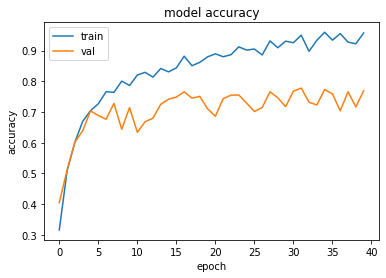

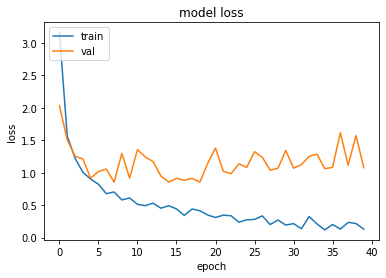

In [ ]:
# Visualize training history

import matplotlib.pyplot as plt


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import os

class_names = []
for root, dirs, files in os.walk('/content/drive/MyDrive/Colab Notebooks/Data/test', topdown=False):
    for name in dirs:
        class_names.append(name)

print(class_names)

['Potato___Early_blight', 'Tomato___Tomato_mosaic_virus', 'Grape___Black_rot', 'Peach___healthy', 'Tomato___Late_blight', 'Blueberry___healthy', 'Strawberry___healthy', 'Tomato___Target_Spot', 'Potato___Late_blight', 'Corn_(maize)___healthy', 'Corn_(maize)___Common_rust_', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Orange___Haunglongbing_(Citrus_greening)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Leaf_Mold', 'Pepper,_bell___healthy', 'Apple___Cedar_apple_rust', 'Raspberry___healthy', 'Apple___Apple_scab', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Peach___Bacterial_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Cherry_(including_sour)___healthy', 'Pepper,_bell___Bacterial_spot', 'Grape___Esca_(Black_Measles)', 'Tomato___healthy', 'Apple___Black_rot', 'Soybean___healthy', 'Apple___healthy', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Corn_(maize)

In [ ]:
ds_test.reset()
X_test, y_test = next(ds_test)
for i in range(int(len(ds_test))-1): #1st batch is already fetched before the for loop.
  img, label = next(ds_test)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

y_test = np.argmax(y_test, axis = 1)



(1936, 224, 224, 3) (1936, 38)


In [ ]:
# X_test, y_test = ds_test
pred = model.predict(ds_test) 
y_pred = np.argmax(pred, axis=1) 


print(y_pred)
# print(y_test)




[ 3  0 20 ... 37 37 33]


In [ ]:
y_pred2 = []
y_test2 = []
for i in range(len(y_pred)):
  y_pred2.append(class_names[y_pred[i]])
  y_test2.append(class_names[y_test[i]])

for i in range(10,20):
  print(y_pred2[i]+'\t\t'+y_test2[i])


Apple___Black_rot		Potato___Early_blight
Potato___Early_blight		Potato___Early_blight
Peach___healthy		Potato___Early_blight
Potato___Early_blight		Potato___Early_blight
Potato___Early_blight		Potato___Early_blight
Potato___Early_blight		Potato___Early_blight
Potato___Early_blight		Potato___Early_blight
Apple___healthy		Potato___Early_blight
Tomato___Tomato_mosaic_virus		Potato___Early_blight
Potato___Early_blight		Potato___Early_blight


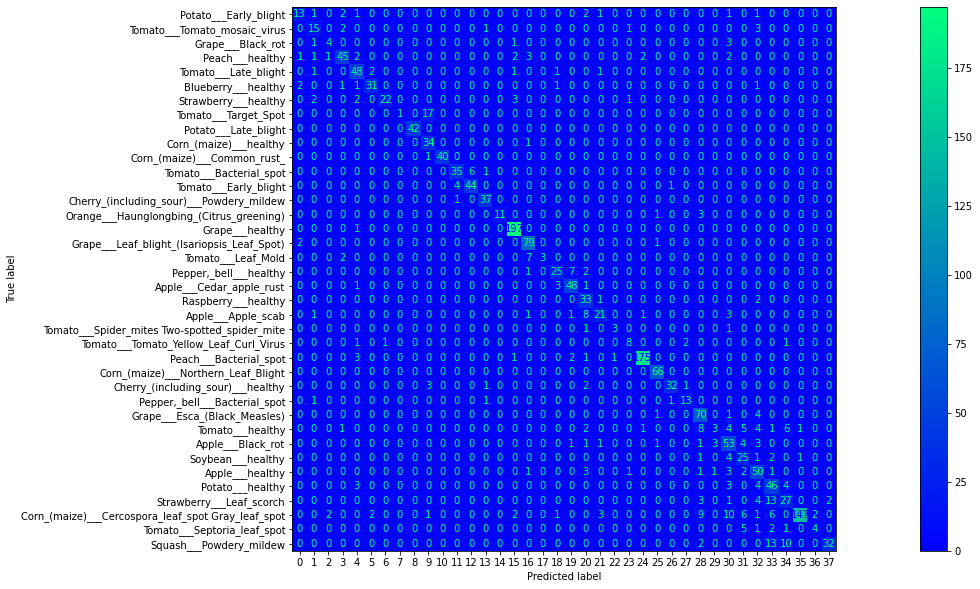

In [ ]:
# import pandas as pd
# class_names
cm = confusion_matrix(y_test,y_pred)
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(30,10))
disp.plot(ax=ax,cmap='winter');
ax.set_xticklabels = np.arange(38)
ax.set_yticklabels(class_names);

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names = class_names))



Accuracy: 0.82

Micro Precision: 0.82
Micro Recall: 0.82
Micro F1-score: 0.82

Macro Precision: 0.79
Macro Recall: 0.73
Macro F1-score: 0.73

Weighted Precision: 0.83
Weighted Recall: 0.82
Weighted F1-score: 0.81

Classification Report

                                                    precision    recall  f1-score   support

                             Potato___Early_blight       0.72      0.59      0.65        22
                      Tomato___Tomato_mosaic_virus       0.65      0.68      0.67        22
                                 Grape___Black_rot       0.57      0.44      0.50         9
                                   Peach___healthy       0.85      0.76      0.80        59
                              Tomato___Late_blight       0.76      0.89      0.82        54
                               Blueberry___healthy       0.89      0.84      0.86        37
                              Strawberry___healthy       0.96      0.73      0.83        30
                         

## Testing Pretrained VGG16 on Data

In [ ]:
for id, layer in enumerate(base_model.layers):

    base_model.layers[id].trainable = False

inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=4096,activation="relu")(x)
x = keras.layers.Dense(units=4096,activation="relu")(x)
outputs = keras.layers.Dense(units=38,activation='softmax')(x)


model = keras.Model(inputs, outputs)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 38)                155686    
                                                                 
Total params: 134,416,230
Trainable params: 119,701,542
Non-t

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(ds_train,
                    epochs = 38,
                    validation_data = ds_valid,
                    verbose = 1,
                    callbacks=[callback])
# model.save(save_path + 'my_model_vgg16-pretrained')

Epoch 1/38
341/341 [==============================] - 28s 83ms/step - loss: 0.1216 - accuracy: 0.9650 - val_loss: 0.9035 - val_accuracy: 0.8088
Epoch 2/38
341/341 [==============================] - 29s 84ms/step - loss: 0.1062 - accuracy: 0.9697 - val_loss: 0.7113 - val_accuracy: 0.8569
Epoch 3/38
341/341 [==============================] - 28s 83ms/step - loss: 0.0970 - accuracy: 0.9708 - val_loss: 0.6614 - val_accuracy: 0.8666
Epoch 4/38
341/341 [==============================] - 28s 83ms/step - loss: 0.0929 - accuracy: 0.9729 - val_loss: 0.8017 - val_accuracy: 0.8586
Epoch 5/38
341/341 [==============================] - 29s 86ms/step - loss: 0.1388 - accuracy: 0.9685 - val_loss: 0.8513 - val_accuracy: 0.8517
Epoch 6/38
341/341 [==============================] - 30s 87ms/step - loss: 0.0557 - accuracy: 0.9850 - val_loss: 0.5844 - val_accuracy: 0.8867
Epoch 7/38
341/341 [==============================] - 28s 82ms/step - loss: 0.0495 - accuracy: 0.9859 - val_loss: 0.7217 - val_accuracy:

In [ ]:
print("Evaluate on test data")
results = model.evaluate(ds_test)
print("test loss, test acc:", results)


Evaluate on test data
121/121 [==============================] - 669s 6s/step - loss: 1.1685 - accuracy: 0.8352
test loss, test acc: [1.168511152267456, 0.8352272510528564]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


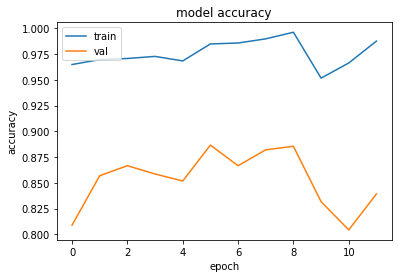

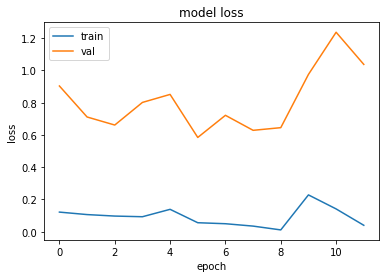

In [ ]:
# Visualize training history

import matplotlib.pyplot as plt


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()